# **Downloading Data**

In [1]:
!wget --header="Host: doc-0g-68-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://docs.google.com/uc?id=0Bz1dfcnrpXM-MUt4cHNzUEFXcmc&export=download" --header="Cookie: AUTH_bbebqfqqlbtlmtum1e2p5hui8kvhh83m_nonce=idt9ut1lb1fo6" --header="Connection: keep-alive" "https://doc-0g-68-docs.googleusercontent.com/docs/securesc/t927msa9aomceink3i5h96e7q5483raf/oq45q1tgsmt4e046d6ka3gdh458k2jr1/1573797600000/18137660436632322230/06797348977280964480/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&authuser=0&nonce=idt9ut1lb1fo6&user=06797348977280964480&hash=6kcc6866k3n7cu4uobdd9pk7hbdqvq29" -O "rvl-cdip.tar.gz" -c

--2019-11-15 07:09:37--  https://doc-0g-68-docs.googleusercontent.com/docs/securesc/t927msa9aomceink3i5h96e7q5483raf/oq45q1tgsmt4e046d6ka3gdh458k2jr1/1573797600000/18137660436632322230/06797348977280964480/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&authuser=0&nonce=idt9ut1lb1fo6&user=06797348977280964480&hash=6kcc6866k3n7cu4uobdd9pk7hbdqvq29
Resolving doc-0g-68-docs.googleusercontent.com (doc-0g-68-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0g-68-docs.googleusercontent.com (doc-0g-68-docs.googleusercontent.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘rvl-cdip.tar.gz’

rvl-cdip.tar.gz         [  <=>               ]  36.10G  85.8MB/s    in 7m 1s   

2019-11-15 07:16:39 (87.9 MB/s) - ‘rvl-cdip.tar.gz’ saved [38762320458]



In [0]:
import shutil
import pandas as pd
import os
import numpy as np
import csv

shutil.unpack_archive('rvl-cdip.tar.gz','data')

# **EDA**

In [3]:
txtfile = r"data/labels/train.txt"
csvfile = r"train.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
df=pd.read_csv("train.csv",header=None)
df.head()

,0
0,imagesq/q/o/c/qoc54c00/80035521.tif 15
1,imagese/e/w/c/ewc23d00/513280028.tif 1
2,imagesw/w/b/t/wbt26e00/2053453161.tif 7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.t...
4,imageso/o/e/x/oex80d00/522787731+-7732.tif 3


In [4]:
#naming columns in data
df.columns=['image']

#Splitting the column into 2 columns image and class using space ' ' as delimiter
df = pd.DataFrame(df['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])
df.head()

,image,class
0,imagesq/q/o/c/qoc54c00/80035521.tif,15
1,imagese/e/w/c/ewc23d00/513280028.tif,1
2,imagesw/w/b/t/wbt26e00/2053453161.tif,7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10
4,imageso/o/e/x/oex80d00/522787731+-7732.tif,3


In [0]:
#saving that to csv file
df.to_csv('train.csv')

In [0]:
#changing datatypes fpr easy use
df['image']=df['image'].astype(str)
df['class']=df['class'].astype(int)

In [0]:
os.chdir("data")

In [0]:
os.mkdir("train")

In [0]:
os.chdir("train")

In [0]:
for i in range(16):
    os.mkdir(str(i))

In [0]:
os.chdir("/content")

In [0]:
for i in range(len(df)):
    for j in range(16):
        if df['class'][i]==j:
            shutil.copy2('data/images/'+df['image'][i],'data/train/'+str(j) +'/')
        else:
            continue

In [0]:
#Renaming folder names for train set
class_name={'0':'letter','1':'form','2':'email','3':'handwritten','4':'advertisement','5':'scientific report','6':'scientific publication','7':'specification','8':'file folder','9':'news article','10':'budget','11':'invoice','12':'presentation','13':'questionnaire','14':'resume','15':'memo'}
path = 'data/train'

i = 0
for j in class_name.keys():
    os.rename(path+'/'+j, path+'/'+class_name[j])
    i=i+1

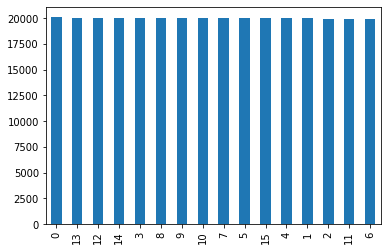

In [15]:
df["class"].value_counts().plot(kind='bar')

From the above graph it can be seen that, the training examples are evenly distributed among respective classes. "Accuarcy"  as a metrics is well suited for this document image classification task.

In [0]:
folders = glob.glob('data/train/*')

In [0]:
images_list=[]
for i in folders:
  for f in glob.glob(i+"/*.tif"):
    images_list.append(f)

In [0]:
read_images = []        

for image in images_list[0:100]:
    read_images.append(cv2.imread(image,cv2.IMREAD_GRAYSCALE))

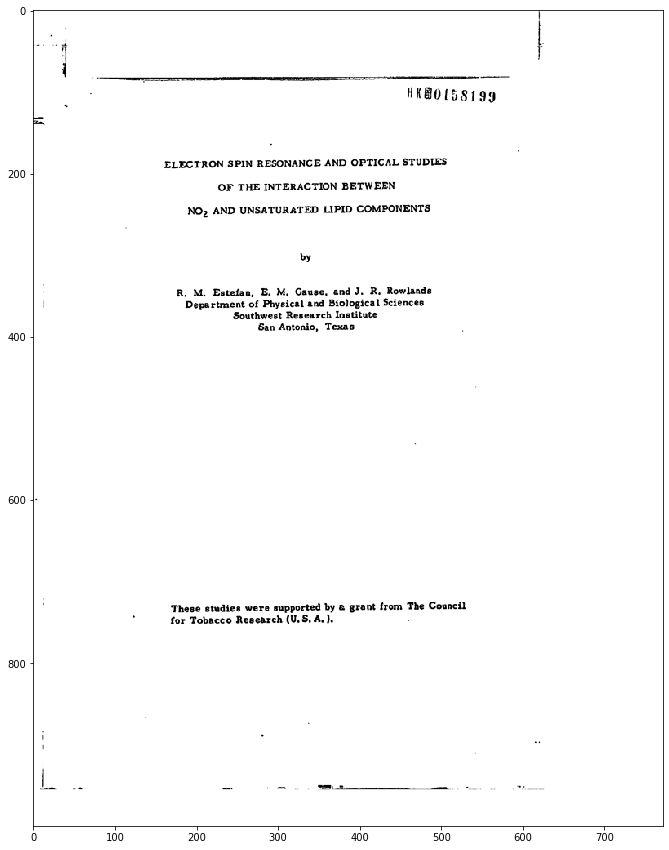

In [78]:
plt.figure(figsize = (15,15))
plt.imshow(read_images[0],cmap="gray")

In [0]:
height = []
width = []
for image in images_list[0:100]:
  img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  width.append(img.shape[1])
  height.append(img.shape[0])

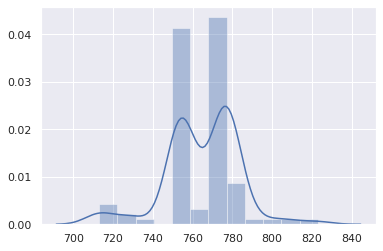

In [82]:
import seaborn as sns
sns.set()
sns.distplot(width,kde = True)
plt.show()

From the above plot we see that width of the images varies. Also as per the information given about the dataset is that height of the images was kept to 1000 pixels only